In [28]:
'''
refer to this video for customizing label
https://www.youtube.com/watch?v=puOKTFXRyr4
https://github.com/Layout-Parser/layout-parser/tree/main

'''

'\nrefer to this video for customizing label\nhttps://www.youtube.com/watch?v=puOKTFXRyr4\n\n'

# Prepare Environment

In this tutorial, we will show how to use the `layoutparser` API to

1. Load Deep Learning Layout Detection models and predict the layout of the paper image
2. Use the coordinate system to parse the output

The `paper-image` is from https://arxiv.org/abs/2004.08686.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:

!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [31]:
!pip install layoutparser # Install the base layoutparser library with

In [32]:
!pip install "layoutparser[ocr]" # Install OCR toolkit

In [33]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-eva66qc6/detectron2_ae604f23693c4f90bdba65574ad2db2c
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-eva66qc6/detectron2_ae604f23693c4f90bdba65574ad2db2c
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [34]:
import layoutparser as lp
import cv2

## Use Layout Models to detect complex layout

`layoutparser` can identify the layout of the given document with only 4 lines of code.

In [35]:
import os
cur_path = '/content/drive/MyDrive/Colab Notebooks/PDF_SUMMARY'

pdf_path = cur_path + "/pdf"
data_path = cur_path + "/data"

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [49]:
image = cv2.imread(data_path + "/1901.00087v2-1.png")
image = image[..., ::-1]
    # Convert the image from BGR (cv2 default loading style)
    # to RGB

In [46]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
    # Load the deep layout model from the layoutparser API
    # For all the supported model, please check the Model
    # Zoo Page: https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html

In [50]:
layout = model.detect(image)
    # Detect the layout of the input image

In [40]:
color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'purple',
    'figure': 'pink',
}


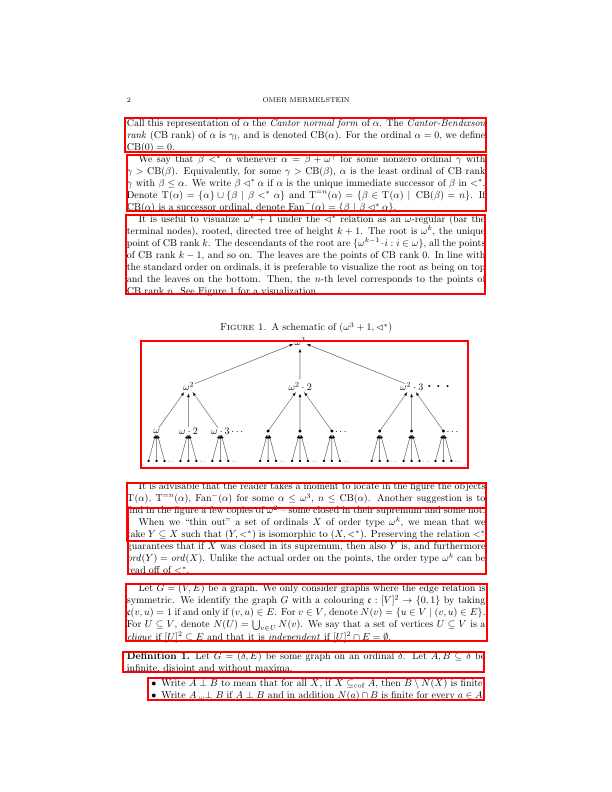

In [51]:
lp.draw_box(image, layout, box_width=2, color_map=color_map)
    # Show the detected layout of the input image

## Check the results from the model

In [ ]:
type(layout)

The `layout` variable is a `Layout` instance, which is inherited from list and supports handy methods for layout processing.

In [52]:
for lo in layout:
  display(lo)
# layout[0]

TextBlock(block=Rectangle(x_1=126.9781494140625, y_1=214.1793212890625, x_2=484.7677917480469, y_2=294.6686096191406), text=None, id=None, type=Text, parent=None, next=None, score=0.9998261332511902)

TextBlock(block=Rectangle(x_1=127.29507446289062, y_1=154.3206329345703, x_2=485.5085754394531, y_2=211.7075653076172), text=None, id=None, type=Text, parent=None, next=None, score=0.9992534518241882)

TextBlock(block=Rectangle(x_1=126.80547332763672, y_1=583.1266479492188, x_2=486.20465087890625, y_2=641.774658203125), text=None, id=None, type=Text, parent=None, next=None, score=0.9987233281135559)

TextBlock(block=Rectangle(x_1=128.1683349609375, y_1=507.1361389160156, x_2=485.7964782714844, y_2=574.8237915039062), text=None, id=None, type=Text, parent=None, next=None, score=0.9977524876594543)

TextBlock(block=Rectangle(x_1=141.14268493652344, y_1=340.0347595214844, x_2=467.0141296386719, y_2=468.3022766113281), text=None, id=None, type=Figure, parent=None, next=None, score=0.9964749217033386)

TextBlock(block=Rectangle(x_1=148.70262145996094, y_1=677.80517578125, x_2=483.0577697753906, y_2=700.5342407226562), text=None, id=None, type=Text, parent=None, next=None, score=0.9877585768699646)

TextBlock(block=Rectangle(x_1=123.20394897460938, y_1=651.5047607421875, x_2=483.79119873046875, y_2=672.5284423828125), text=None, id=None, type=Text, parent=None, next=None, score=0.9757297039031982)

TextBlock(block=Rectangle(x_1=125.61487579345703, y_1=117.27619171142578, x_2=485.7557067871094, y_2=152.92626953125), text=None, id=None, type=Text, parent=None, next=None, score=0.9508845210075378)

TextBlock(block=Rectangle(x_1=127.38971710205078, y_1=482.6611328125, x_2=485.0291442871094, y_2=541.6436767578125), text=None, id=None, type=Text, parent=None, next=None, score=0.927299976348877)

`layout` contains a series of `TextBlock`s. They store the coordinates in the `.block` variable and other information of the blocks like block type in `.type`, text in `.text`, etc. More information can be found at the [documentation](https://layout-parser.readthedocs.io/en/latest/api_doc/elements.html#layoutparser.elements.TextBlock).

## Use the coordinate system to process the detected layout

Firstly we filter text regions of specific type:

In [53]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

As you will see below, the text recognized as section 5.2 will be dropped
from our layout-recognized text regions as it is parsed as a TextBlock of
type 'Title' as indicated by its different colored bounding box in the image
above.

As there could be text regions detected inside the figure region, we just drop them:

In [54]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=126.9781494140625, y_1=214.1793212890625, x_2=484.7677917480469, y_2=294.6686096191406), text=None, id=None, type=Text, parent=None, next=None, score=0.9998261332511902), TextBlock(block=Rectangle(x_1=127.29507446289062, y_1=154.3206329345703, x_2=485.5085754394531, y_2=211.7075653076172), text=None, id=None, type=Text, parent=None, next=None, score=0.9992534518241882), TextBlock(block=Rectangle(x_1=126.80547332763672, y_1=583.1266479492188, x_2=486.20465087890625, y_2=641.774658203125), text=None, id=None, type=Text, parent=None, next=None, score=0.9987233281135559), TextBlock(block=Rectangle(x_1=128.1683349609375, y_1=507.1361389160156, x_2=485.7964782714844, y_2=574.8237915039062), text=None, id=None, type=Text, parent=None, next=None, score=0.9977524876594543), TextBlock(block=Rectangle(x_1=148.70262145996094, y_1=677.80517578125, x_2=483.0577697753906, y_2=700.5342407226562), text=None, id=None, type=Text, parent=None, next=None, score

In [55]:

figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])
figure_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=141.14268493652344, y_1=340.0347595214844, x_2=467.0141296386719, y_2=468.3022766113281), text=None, id=None, type=Figure, parent=None, next=None, score=0.9964749217033386)], page_data={})

In [ ]:
title_blocks = lp.Layout([b for b in layout if b.type=='Title'])
title_blocks

Finally, sort the text regions and assign ids:

In [56]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)
# The b.coordinates[1] corresponds to the y coordinate of the region
# sort based on that can simulate the top-to-bottom reading order
right_blocks = lp.Layout([b for b in text_blocks if b not in left_blocks])
right_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

# And finally combine the two lists and add the index
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

Visualize the cleaned text blocks:

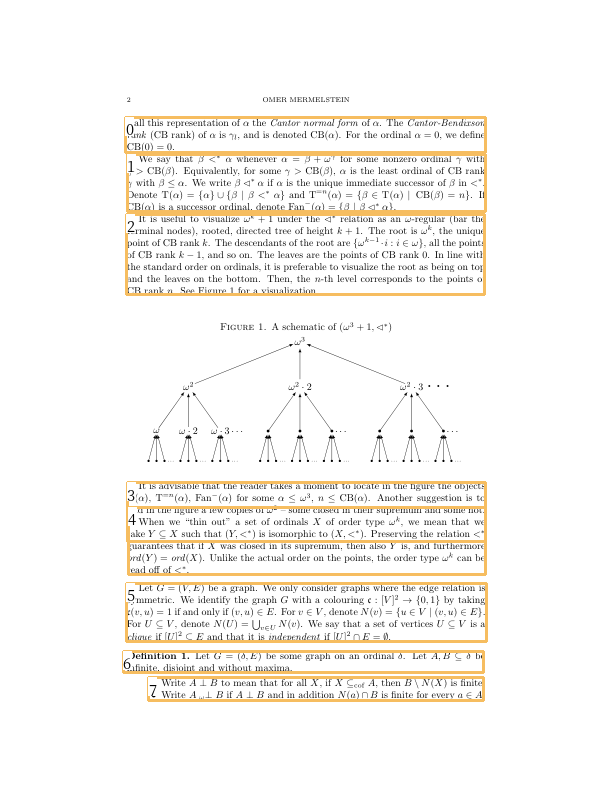

In [57]:
lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

## Fetch the text inside each text region

We can also combine with the OCR functionality in `layoutparser` to fetch the text in the document.

In [58]:
# import tesseract-ocr

ocr_agent = lp.TesseractAgent(languages='eng')
    # Initialize the tesseract ocr engine. You might need
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [59]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [60]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

Call this representation of a the Cantor normal form of a. The Cuntor-Bendixson
rank (CB rank) of a is, and i denoted CB(a). Fur the ordinal a =0, we define
BIO) =0.

 

---
‘We say that 9 <* a whenever a = 3 +." for some nonzero ordinal + with
+ > CHG), Equivalently, for ome > CB(3), ae the last ordinal of CB rank
with J<a. We wate 3 4° a if is the unique immediate successor of in ="
Denote Tia) = {a} U{3 | 8 <7 a} and T="a) = {3 € T(a) | CB(S) =n}. IE
‘CBla) is a successor ordinal, denote Fan-(a) = {3 | 3-<° a).

   

---
Te is useful to visualize w* +1 under the <* relation as an w-regular (bar the
terminal nodes), rooted, dected t2ee of eight B+ 1. The vot, the unique
polit of CB rank k. The descendants of the rot are {a1 € w) all the pots
FCB rank K~ 1, and so on. The leaves ate the points of CB rank 0. In line with
the standard order on ordinals, iis preferable to visualize the rot as being on top
‘andthe leaves on the bottom, The, the m-th level corresponds to the pints of
CB 